# Aula 6 - Árvore de decisão

- 1) O que é uma árvore de decisão;
- 2) Rapida aplicação;
- 3) Como exatamente funciona uma árvore?;
- 4) Árvores de Classificação;
- 5) Árvores de Regressão;

____
____
____

## 1) O que é uma árvore de decisão

<img src="https://didatica.tech/wp-content/uploads/2020/07/image-3.png" width=500>

Fonte: https://didatica.tech/como-funciona-o-algoritmo-arvore-de-decisao/

<img src="https://web.tecnico.ulisboa.pt/ana.freitas/bioinformatics.ath.cx/bioinformatics.ath.cx/uploads/RTEmagicC_arv_dec4_01.gif.gif" width=500>

Fonte: http://web.tecnico.ulisboa.pt/ana.freitas/bioinformatics.ath.cx/bioinformatics.ath.cx/indexf23d.html?id



### Estrutura de uma árvore de decisão:

<img src="https://i1.wp.com/www.vooo.pro/insights/wp-content/uploads/2016/12/RDS-Vooo_insights-Tutorial_arvore_de_decisao_02.jpg?resize=640%2C371&ssl=1" width=600>


Fonte: https://www.vooo.pro/insights/um-tutorial-completo-sobre-a-modelagem-baseada-em-tree-arvore-do-zero-em-r-python/

#### Porque usar uma árvore: 

- Fácil interpretabilidade;
- Auxilia na exploração de dados;
- Traz um apelo visual.

##### Mas cuidado com o risco de overfitting!

#### Nota:

Já foi visto árvores de decisão anteriormente no curso, no módulo de estrutura de dados.

Naquele contato, nós criamos árvores **instanciando a classe com a estrutura que desejávamos**.

Agora, conheceremos árvores como **estimadores**, de modo que á arvore **irá determinar sua estrutura com base nos dados de treino**!

Isto é, a árvore irá determinar **quais são as melhores quebras** a serem feitas em cada nó.

Entenderemos mais a frente como a "qualidade" de uma quebra é quantificada.

Antes, vamos construir um modelo de árvore na prática!

# Inicialmente, vamos a uma aplicação!

In [1]:
# importe as principais bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# desabilita os warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("breast_cancer.csv")
df.shape

(569, 32)

In [3]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
# df.isnull().sum()

In [5]:
# seleciona as variaveis

# achei o problema de ontem, passei dormindo no id. Quando removemos ele a regressão Logistica funciona normal.
X = df.select_dtypes(include = np.number).drop(columns = ["id"]) 
y = df.diagnosis

In [6]:
y.value_counts(dropna = False, normalize = True)

B    0.627417
M    0.372583
Name: diagnosis, dtype: float64

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [8]:
from sklearn.tree import DecisionTreeClassifier

In [9]:
dtc = DecisionTreeClassifier()

In [10]:
dtc.fit(X_train, y_train)

DecisionTreeClassifier()

In [11]:
y_pred = dtc.predict(X_test)

In [12]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

In [13]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           B       0.93      0.94      0.94        72
           M       0.90      0.88      0.89        42

    accuracy                           0.92       114
   macro avg       0.92      0.91      0.91       114
weighted avg       0.92      0.92      0.92       114



In [14]:
print(confusion_matrix(y_test, y_pred))

[[68  4]
 [ 5 37]]


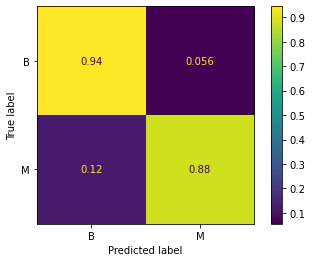

In [15]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, normalize = 'true')

# O que acontece realmente com a árvore?

__Exemplo__

Digamos que uma amostra de 30 alunos tem duas variáveis: Sexo (menino ou menina), Turma (IX ou X). 

Digamos também que 15 destes 30 jogam tênis no recreio. 

Queremos separar os alunos: quem **joga tênis** e quem **não joga tênis**


Toda árvore começa pelo nó raiz, então, uma pergunta natural é: **qual feature utilizamos para fazer a quebra do nó raiz: sexo ou turma?**

Há duas quebras possíveis:

<img src="https://i2.wp.com/www.vooo.pro/insights/wp-content/uploads/2016/12/RDS-Vooo-Tutorial_completo_arvore_decisao_03.jpg?resize=617%2C293&ssl=1" width=500>

Vemos que, **dependendo da feature que utilizamos pra fazer a quebra**, conseguimos **graus de separações diferentes dos dados com relação ao target**:


<table>
<thead>
  <tr>
    <th colspan="4"><center>Sexo</center></th>
  </tr>
</thead>
<tbody>
  <tr>
    <td colspan="2"><center>Meninas</center></td>
    <td colspan="2"><center>Meninos</center></td>
  </tr>
  <tr>
    <td><center>jogam tênis</center></td>
    <td><center>NÃO jogam tênis</center></td>
    <td><center>jogam tênis</center></td>
    <td><center>NÃO jogam tênis</center></td>
  </tr>
  <tr>
    <td><center>2</center></td>
    <td><center>8</center></td>
    <td><center>13</center></td>
    <td><center>7</center></td>
  </tr>
  <tr>
    <td colspan="2"><center>10</center></td>
    <td colspan="2"><center>20</center></td>
  </tr>
</tbody>
</table>


<table>
<thead>
  <tr>
    <th colspan="4"><center>turma</center></th>
  </tr>
</thead>
<tbody>
  <tr>
    <td colspan="2"><center>IX</center></td>
    <td colspan="2"><center>X</center></td>
  </tr>
  <tr>
    <td><center>jogam tênis</center></td>
    <td><center>NÃO jogam tênis</center></td>
    <td><center>jogam tênis</center></td>
    <td><center>NÃO jogam tênis</center></td>
  </tr>
  <tr>
    <td><center>6</center></td>
    <td><center>8</center></td>
    <td><center>9</center></td>
    <td><center>7</center></td>
  </tr>
  <tr>
    <td colspan="2"><center>14</center></td>
    <td colspan="2"><center>16</center></td>
  </tr>
</tbody>
</table>

Como decidir qual das quebrar acima **separou melhor os dados com relação ao target?**

Matematicamente, o modelo pode usar dois critérios diferentes para decidir como fazer as quebras na árvore: o **critério de Gini** ou o **critério da entropia**.

______

**Critério de Gini**

A **impureza de Gini** mede o quão "impuras" são as folhas das árvores construídas após as quebras nos nós. O coeficiente é dado por:

$$Gini(D) = 1 - \sum{p_{i}^2}$$

Onde $p_i$ são as **proporções** de separação do target em cada quebra.

Aqui estaremos interessados **em como a impureza muda após as quebras**. Nosso objetivo será **maximizar a purificação proporcionada pela quebra nos nós** -- mais precisamente, estamos interessados em determinar **qual é a quebra que proporciona a maior purificação**.

- **Impureza antes da divisão**: Como não havia separação alguma, a impureza era dada simplesmente pelo balanço natural dos dados: 

$$G(\text{pré-divisão}) = 1 - ((15/30)^2 + (15/30)^2) = 0.5$$

Temos duas quebras possíveis:

- Divisão por **sexo**: após a divisão dos dados pela feature **sexo**, passamos a ter as seguintes impurezas, segundo a tabela acima: 

    - $G(\text{meninas}) = 1 - (\frac{2}{10}^2 + \frac{8}{10}^2) = 0.319$
    
    - $G(\text{meninos}) = 1 - ( \frac{13}{20}^2 + \frac{7}{20}^2) = 0.454$
    
    Ou seja, após a divisão, a impureza total passa a ser a média ponderada: 
    
    <br>
    
    - $G(\text{pós-divisão}) = \frac{10}{30} \times G(\text{meninas}) + \frac{20}{30} \times G(\text{meninos})
    = 0.33 \times 0.319 + 0.66 \times 0.454
    = 0.40491$
    

<!-- Assim, **a perda de impureza proporcionada pela quebra** dos dados segundo a feature **sexo** é de:

- $\Delta G_{\text{sexo}} = G(\text{pré-divisão}) - G(\text{pós-divisão}) = 0.5 - 0.40491 = $ **0.095** -->

- Divisão por **classe**: após a divisão dos dados pela feature **classe**, passamos a ter as seguintes impurezas, segundo a tabela acima:

    - $G(\text{IX}) = 1 - (\frac{6}{14}^2 + \frac{8}{14}^2) = 0.489$
    
    - $G(\text{X}) = 1 - ( \frac{9}{16}^2 + \frac{7}{16}^2) = 0.492$
    
    Ou seja, após a divisão, a impureza total passa a ser a média ponderada: 
    
    <br>
    
    - $G(\text{pós-divisão}) = \frac{14}{30} \times G(\text{IX}) + \frac{16}{30} \times G(\text{X})
    = 0.46 \times 0.489 + 0.53 \times 0.492
    = 0.4857$
    

<!-- Assim, **a perda de impureza proporcionada pela quebra** dos dados segundo a feature **classe** é de:
    
- $\Delta G_{\text{classe}} = G(\text{pré-divisão}) - G(\text{pós-divisão}) = 0.5 - 0.4857 = $ **0.014**  -->

 
Agora, como escolher a melhor quebra?

> O **critério de Gini** consiste em **escolher a quebra que proporciona a maior purificação** | **menor grau de impureza**.

Assim, a divisão a ser escolhida seria por **sexo**. 

Depois, aplica-se o mesmo procedimento para os nós resultantes.

_________

**Critério de entropia**

A **entropia** é uma quantidade definida em física e teoria da informação com o objetivo de quantificar **o grau de desordem de um sistema**, ou também, uma medidad da aleatoriedade (impureza) de uma variável.

A entropia é dada por:

 $$E = -\sum{p_{i} \log_{2}{p_{i}}}$$
 
Onde $p_i$ são as **proporções** de separação do target em cada quebra.

O objetivo é o mesmo: Encontrar o menor grau de impureza.
 
Temos duas quebras possíveis:

- Divisão por sexo: 

    - $E(\text{meninas}) = -1 \times (\frac{2}{10} \log_{2}\frac{2}{10} + \frac{8}{10} \log_{2}\frac{8}{10}) = 0.721$
    - $E(\text{meninos}) = -1 \times (\frac{13}{20} \log_{2}\frac{13}{20} + \frac{7}{20} \log_{2}\frac{7}{20}) = 0.934$
    
    A entropia ponderada após a divisão por **sexo** é:
    
    <br>
    
    - $E(\text{pós-divisão}) = \frac{10}{30} \times E(\text{meninas}) + \frac{20}{30} \times E(\text{meninos}) =  0.863$
    
    
    <br>
    

<br>

- Divisão por classe:

    - $E(\text{IX}) = -1 \times (\frac{6}{14} \log_{2}\frac{6}{14} + \frac{8}{14} \log_{2}\frac{8}{14}) = 0.985$
    - $E(\text{X}) = -1 \times (\frac{9}{16} \log_{2}\frac{9}{16} + \frac{7}{16} \log_{2}\frac{7}{16}) = 0.988$
    
    A entropia ponderada após a divisão por **classe** é:
    
    <br>
    
    - $E(\text{pós-divisão}) = \frac{10}{30} \times E(\text{IX}) + \frac{20}{30} \times E(\text{X}) =  0.986$
    
    
    <br>
    


Também pela entropia, a divisão a ser escolhida seria por **sexo**. 

Depois, aplica-se o mesmo procedimento para os nós resultantes, até obter-se nós puros.

# Exercício 1

Faça como eu fiz anteriormente com o breast_cancer:

 - 1) Importe os dados e faça uma seleção dos features;
 
 - 2) Realize o split dos dados em treino e teste;
 
 - 3) from sklearn.tree import DecisionTreeClassifier... ; 
 
 - 4) Treine e avalie o modelo.
 
 - 5) Faça o mesmo com outros modelos de classificação e compare-os!

In [16]:
df = pd.read_csv("breast_cancer.csv")

In [17]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


### teste com o logit...

In [18]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train, y_train)

y_pred_lr_train = lr.predict(X_train)
y_pred_lr = lr.predict(X_test)

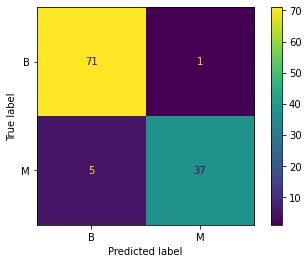

In [19]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_lr)

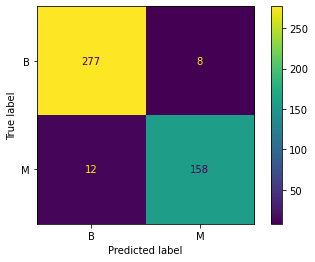

In [20]:
ConfusionMatrixDisplay.from_predictions(y_train, y_pred_lr_train)

### Agora, pra árvore:

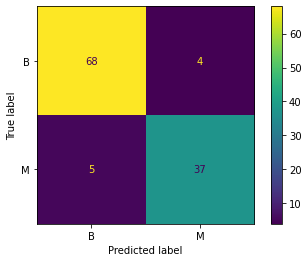

In [21]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

In [22]:
y_pred_dtc_train = dtc.predict(X_train)

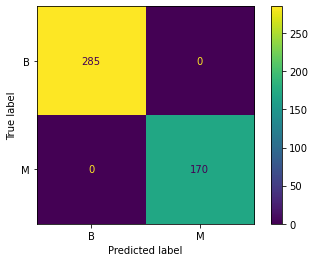

In [23]:
ConfusionMatrixDisplay.from_predictions(y_train, y_pred_dtc_train)

__Visualizando a árvore de decisão__

É possível visualizar a árvore de decisão criada com o próprio sklearn!

Para isso, basta usar a função `plot_tree()` do sub-módulo tree, conforme abaixo!

Para mais detalhes sobre como plotar a árvore, [clique aqui](https://scikit-learn.org/stable/modules/tree.html#tree)

In [24]:
from sklearn.tree import plot_tree

Obs.: vou deixar os plots comentados pra não pesar no notebook.

In [25]:
# fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(18, 18), dpi=300)

# plot_tree(dtc)

# fig.savefig("arvore1.png")

In [26]:
# fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(18, 18), dpi=500)

# plot_tree(dtc, feature_names=X_train.columns, class_names=y_train.unique())

# fig.savefig("arvore1.png")

In [27]:
# fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(18, 18))

# plot_tree(dtc, feature_names=X_train.columns, max_depth=3)

Alguns métodos interessantes da árvore:

In [28]:
dtc.get_depth()

8

In [29]:
dtc.get_n_leaves()

24

Temos uma árvore **muito profunda**, o que implica em um **modelo muito complexo**.

De fato, se imaginarmos a hipótese como uma função definida por partes, quanto mais quebras, mais partes, o que torna a hipótese mais complexa, e, portanto, mais propensa a overfitting!

Uma visualização do que acontece com o espaço de features:

<img src=https://paulvanderlaken.files.wordpress.com/2020/03/readme-titanic_plot-11.png width=500>

#### Outro exemplo
<img src = https://scikit-learn.org/stable/_images/sphx_glr_plot_iris_dtc_001.png  width=500> 


##### Atenção! Vale ler o artigo sobre Árvore de decisão do próprio Scikit Learn
Fonte: https://scikit-learn.org/stable/modules/tree.html

Antes de avançarmos na direção de melhoria deste cenário, vamos parar e entender um pouco mais a fundo como que o estimador de árvore de decisão funciona!

_______

E, além do critério pro split, temos alguns outros hiperparâmetros muito importantes para a árvore de decisão, sobretudo no que diz respeito à sua **regularização**: `max_depth`, `min_samples_split`, `min_samples_leaf`, `max_leaf_nodes`, `min_impurity_decrease`

 - max_depth: Maxima profundidade;
 - min_samples_split: minimo de amostras para realizar um split;
 - min_samples_leaf: minimo de amostras necessarias para ter uma folha;
 - min_impurity_decrease: menor grau de impureza para realizar um split;

Vamos então treinar um modelo melhor?

Vamos usar o que aprendemos na aula passada e já usar o Grid Search!

_________________

In [30]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, StratifiedKFold

In [31]:
# ============================================
# pipe com só uma etapa (modelagem), pq nao fizemos nada de preprocessamento

pipe = Pipeline([("dt", DecisionTreeClassifier(random_state=42))])

# ============================================

params_grid_dt = {"dt__criterion" : ["gini", "entropy"],
                  "dt__splitter" : ["best", "random"],
                  "dt__max_depth" : range(4, 11)} 

splitter = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

grid_dt = GridSearchCV(estimator=pipe,
                       param_grid=params_grid_dt,
                       scoring="f1_weighted",
                       cv=splitter,
                       verbose=0)

grid_dt.fit(X_train, y_train)

# ============================================

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('dt',
                                        DecisionTreeClassifier(random_state=42))]),
             param_grid={'dt__criterion': ['gini', 'entropy'],
                         'dt__max_depth': range(4, 11),
                         'dt__splitter': ['best', 'random']},
             scoring='f1_weighted')

Muito melhor, não é mesmo! E longe de estar overfitado!

Veja, como o modelo agora está bem mais simples:

In [32]:
grid_dt.best_params_

{'dt__criterion': 'entropy', 'dt__max_depth': 8, 'dt__splitter': 'random'}

[[70  2]
 [ 4 38]]


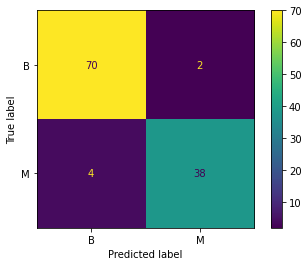

In [33]:
y_pred_test = grid_dt.predict(X_test)

print(confusion_matrix(y_test, y_pred_test))

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test)
plt.show()

In [34]:
# fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(18, 18), dpi=500)

# # note que temos que passar o objeto da árvore, que está dentro do objeto do grid search!
# plot_tree(grid_dt.best_estimator_["dt"], feature_names=X_train.columns)

# fig.savefig("arvore_regularizada.png")

_________

# Exercício 2

Use o dataset titanic do seaborn e realize uma otimização de hiperparâmetros da árvore utilizando Grid Search.

 - 1) Importe o dataset e faça o tratamento e seleção das variáveis;
 - 2) Faça o split dos dados em treino e teste;
 - 3) Instancie o modelo no pipeline;
 - 4) Defina os hiperparâmetros para o Grid Search;
 - 5) Treine o modelo;
 - 6) Faça o Gráfico da árvore;

In [35]:
dt = sns.load_dataset("titanic")

In [36]:
dt.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [37]:
dt.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

In [38]:
X = dt.select_dtypes(np.number).drop(columns=["survived", "age"]) # joguei fora "survived" porque é target e "age" porque tem muito nulo
y = dt["survived"]

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify=y)

In [40]:
y_train.value_counts(dropna = False, normalize = True)

0    0.616573
1    0.383427
Name: survived, dtype: float64

In [41]:
pipe = Pipeline([("dtc", DecisionTreeClassifier(random_state=42))])


params_grid_dtc = {"dtc__criterion" : ["gini", "entropy", "log_loss"],
                  "dtc__splitter" : ["best", "random"],
                  "dtc__max_depth" : range(4, 15),
                  "dtc__min_samples_leaf" : range(1,5)}   

splitter = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

grid_dtc = GridSearchCV(estimator=pipe,
                       param_grid=params_grid_dtc,
                       scoring="f1_weighted",
                       cv=splitter,
                       verbose=0)

grid_dtc.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('dtc',
                                        DecisionTreeClassifier(random_state=42))]),
             param_grid={'dtc__criterion': ['gini', 'entropy', 'log_loss'],
                         'dtc__max_depth': range(4, 15),
                         'dtc__min_samples_leaf': range(1, 5),
                         'dtc__splitter': ['best', 'random']},
             scoring='f1_weighted')

In [42]:
grid_dtc.best_params_

{'dtc__criterion': 'entropy',
 'dtc__max_depth': 6,
 'dtc__min_samples_leaf': 1,
 'dtc__splitter': 'best'}

In [43]:
y_pred = grid_dtc.predict(X_test)

In [44]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.69      0.91      0.79       110
           1       0.71      0.36      0.48        69

    accuracy                           0.70       179
   macro avg       0.70      0.64      0.63       179
weighted avg       0.70      0.70      0.67       179



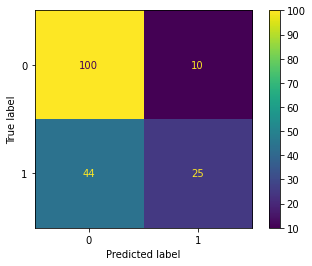

In [45]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

### E ai? 

O modelo ainda não ficou muito bom. Ao que pode-se ver pela da medida de "precision" e "recall", ele ainda não está entendendo ao certo como classificar uma pessoa como sobrevivente (1) mesmo após a validação cruzada e o Grid Search. Vale observar mais parâmetros para ver o que mais pode ser melhorado.

A baixo vamos a plotagem da árvore!

In [46]:
y_train.unique().astype(str)

array(['0', '1'], dtype='<U21')

In [47]:
modelo = grid_dtc.best_estimator_["dtc"] # lembre-se de resgatar sua arvore do pipeline que está dentro do grid search
nomes_das_variaveis = X_train.columns
nomes_das_classes = y_train.unique().astype(str) # tive que converter as classes para string, se não não aceita :/


# Aqui, os passos para salvar a árvore direto, sem que ela abra no notebook

plt.figure(figsize = (50, 50), dpi = 300) # criei a figura
plot_tree(modelo, feature_names=nomes_das_variaveis, class_names = nomes_das_classes, filled = True) # plotei
plt.savefig("arvore_exercicio_2.png") # salvei
plt.close() # fechei

## 6) Árvores de regressão

Alguns algoritmos de classificação podem ser utilizados como algoritmos de regressão, inclusive árvores de decisão!

As **árvores de regressão** consistem em funções com valores discretos, similar a uma escada, onde cada degrau é o valor de uma folha. [Aqui](https://scikit-learn.org/stable/auto_examples/tree/plot_tree_regression.html) há detalhes sobre a classe do sklearn; e [aqui](https://www.youtube.com/watch?v=g9c66TUylZ4) está o StatQuest sobre árvores de regressão!

Considere o seguinte dataset:

<img src='https://s3-sa-east-1.amazonaws.com/lcpi/800a4332-e709-4ea3-8c24-959c05c8fd65.png' width=500>

O algoritmo irá obter os valores do target como sendo **a média dos valores de cada folha da árvore final**. 

Visualmente: 

<img src='https://s3-sa-east-1.amazonaws.com/lcpi/64cb4edd-20e1-486a-8fc9-60e60e1485d5.png' width=500>

Para a escolha das melhores divisões: 

- o algoritmo percorre a médida entre cada par de pontos das features; 
- define estes valores como divisões (sequencialmente); 
- para cada divisão experimentada, o algoritmo calcula o MSE;
- a melhor divisão é aquela que apresentar o menor erro!

Visualmente:

<img src='https://s3-sa-east-1.amazonaws.com/lcpi/be58ac8b-5c59-4b9f-be79-e000d060e9e3.png' width=500>

<img src='https://s3-sa-east-1.amazonaws.com/lcpi/1f317afd-6119-41a5-849d-cee038403cf2.png' width=500>

Outro exemplo de árvore de regressão treinada (note a aparência da hipótese -- são "setores", que em uma única dimensão parecem com degraus):

<img src="https://res.cloudinary.com/practicaldev/image/fetch/s--YryIJN_o--/c_imagga_scale,f_auto,fl_progressive,h_900,q_auto,w_1600/https://thepracticaldev.s3.amazonaws.com/i/7oxf0e3cggdj9jayxeig.png" width=600>

Vamos fazer um modelo de árvore de regressão para precificação de casas!

A classe é [DecisionTreeRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html)

# Exercício 3

Use o dataset house_prices, aplique o DecisionTreeRegressor. Realize uma otimização de hiperparâmetros da árvore utilizando Grid Search.

 - 1) Importe o dataset e faça o tratamento e seleção das variáveis;
 - 2) Faça o split dos dados em treino e teste;
 - 3) Instancie o modelo no pipeline;
 - 4) Defina os hiperparâmetros para o Grid Search;
 - 5) Treine o modelo;
 - 6) Faça o Gráfico da árvore;

In [48]:
df = pd.read_csv("house_prices.csv")

In [49]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [50]:
X = df.select_dtypes(include=np.number).drop(columns = ["SalePrice", "LotFrontage", "GarageYrBlt", "MasVnrArea"])
y = df.SalePrice

In [51]:
X.isnull().sum()

Id               0
MSSubClass       0
LotArea          0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageCars       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0
dtype: int64

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [53]:
from sklearn.tree import DecisionTreeRegressor

In [54]:
pipe = Pipeline([("dtr", DecisionTreeRegressor(random_state=42))])

# os parametros são bem semelhantes
# "friedman_mse" é tipo um mse especial para árvores

params_grid_dtr = {"dtr__criterion" : ["squared_error", "friedman_mse", "absolute_error"],
                  "dtr__splitter" : ["best", "random"],
                  "dtr__max_depth" : range(4, 15),
                  "dtr__min_samples_leaf" : range(1,5)}   

splitter = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

grid_dtr = GridSearchCV(estimator=pipe,
                       param_grid=params_grid_dtr,
                       scoring="neg_mean_absolute_error",
                       cv=splitter,
                       verbose=0)

grid_dtr.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('dtr',
                                        DecisionTreeRegressor(random_state=42))]),
             param_grid={'dtr__criterion': ['squared_error', 'friedman_mse',
                                            'absolute_error'],
                         'dtr__max_depth': range(4, 15),
                         'dtr__min_samples_leaf': range(1, 5),
                         'dtr__splitter': ['best', 'random']},
             scoring='neg_mean_absolute_error')

In [55]:
grid_dtr.best_params_

{'dtr__criterion': 'squared_error',
 'dtr__max_depth': 9,
 'dtr__min_samples_leaf': 3,
 'dtr__splitter': 'random'}

In [56]:
y_pred = grid_dtr.predict(X_test)

In [57]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [58]:
print("\nMétricas de teste:\n")
print(f"R^2: {r2_score(y_test, y_pred):.2f}")
print(f"MAE: {mean_absolute_error(y_test, y_pred):.2f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred)):.2f}") 


Métricas de teste:

R^2: 0.80
MAE: 26993.30
RMSE: 40902.99


In [64]:
# Inclusive, já olhou todas as métricas do scikit learn? 
#import sklearn
#sklearn.metrics.get_scorer_names()

In [60]:
# modelo = grid_dtr.best_estimator_["dtr"]

# plt.figure(figsize = (50, 50), dpi = 300) # criei a figura
# plot_tree(modelo, feature_names=nomes_das_variaveis, class_names = nomes_das_classes, filled = True) # plotei
# plt.savefig("arvore_exercicio_3.png") # salvei
# plt.close() # fechei